# ML-6 Non-Hierarchical Clustering

# Import Library

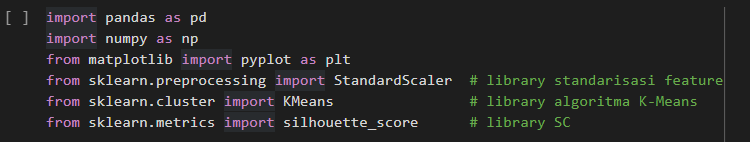

In [ ]:
# Tulis di sini
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

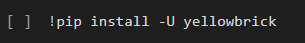

In [ ]:
# Tulis di sini
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

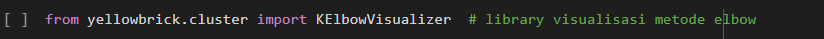

In [ ]:
# Tulis di sini
from yellowbrick.cluster import KElbowVisualizer 

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

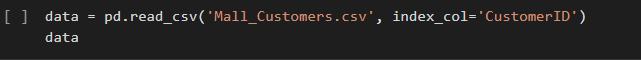

In [ ]:
# Tulis di sini
data = pd.read_csv('Mall_Customers.csv', index_col="CustomerID")

Memeriksa kelengkapan dataset.

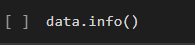

In [ ]:
# Tulis di sini
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

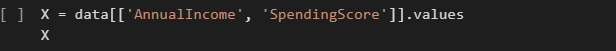

In [ ]:
# Tulis di sini
X = data[['AnnualIncome','SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

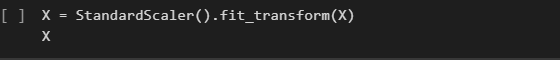

In [ ]:
# Tulis di sini
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



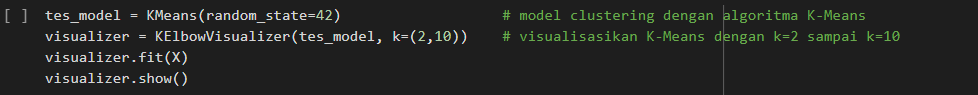

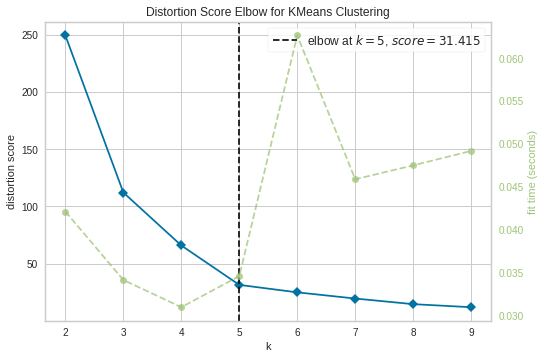

In [ ]:
from yellowbrick.cluster.elbow import KElbow
# Tulis di sini
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

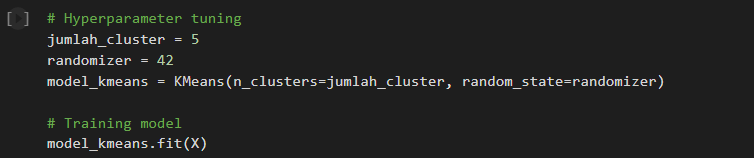

In [ ]:
# Tulis di sini
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

#Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

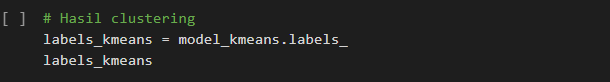

In [ ]:
# Tulis di sini
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1,
       0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

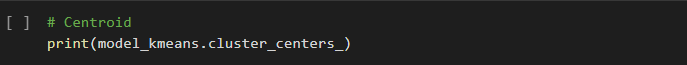

In [ ]:
# Tulis di sini
print(model_kmeans.cluster_centers_)

[[-0.09894748 -1.20506271]
 [-0.11772005  0.91897759]
 [ 7.52694521 -0.11868539]
 [ 0.37342132  4.15876808]
 [-0.17079383 -0.15322869]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

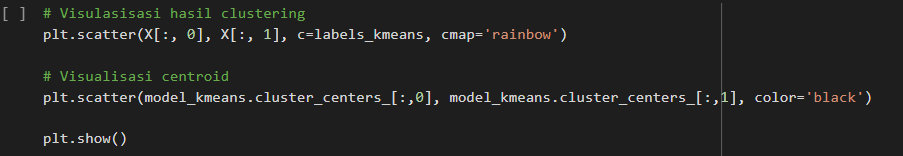

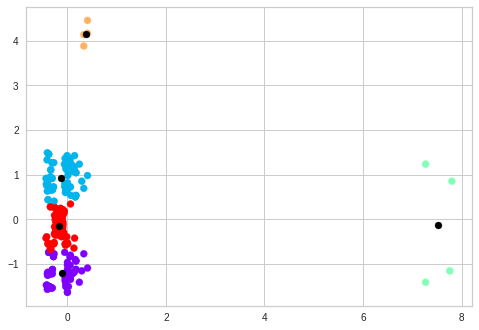

In [ ]:
# Tulis di sini
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='rainbow')

#Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

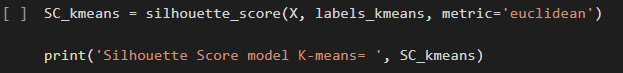

In [ ]:
# Tulis si sini
SC_kmeans = silhouette_score(X, labels_kmeans, metric = 'euclidean')
print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

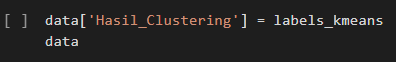

In [ ]:
# Tulis di sini
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,1
5,Female,31,17,40,4
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

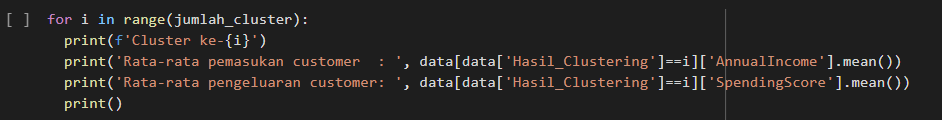

In [ ]:
# Tulis di sini
for i in range(jumlah_cluster):
  print(f'Cluster ke{i}')
  print('Rata rata pemasukan customer :', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata rata pengeluaran customer :', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke0
Rata rata pemasukan customer : 63.12280701754386
Rata rata pengeluaran customer : 14.403508771929825

Cluster ke1
Rata rata pemasukan customer : 60.4054054054054
Rata rata pengeluaran customer : 81.06756756756756

Cluster ke2
Rata rata pemasukan customer : 1167.0
Rata rata pengeluaran customer : 48.5

Cluster ke3
Rata rata pemasukan customer : 131.5
Rata rata pengeluaran customer : 182.75

Cluster ke4
Rata rata pemasukan customer : 52.722772277227726
Rata rata pengeluaran customer : 47.415841584158414



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Activity ML-6

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

In [ ]:
Y = data[['Age', 'AnnualIncome','SpendingScore']].values
Y

array([[  19,   15,   39],
       [  21,   15,   81],
       [  20,   16,    6],
       [  23,   16,   77],
       [  31,   17,   40],
       [  22,   17,   76],
       [  35,   18,    6],
       [  23,   18,   94],
       [  64,   19,    3],
       [  30,   19,   72],
       [  67,   19,   14],
       [  35,   19,   99],
       [  58,   20,   15],
       [  24,   20,   77],
       [  37,   20,   13],
       [  22,   20,   79],
       [  35,   21,   35],
       [  20,   21,   66],
       [  52,   23,   29],
       [  35,   23,   98],
       [  35,   24,   35],
       [  25,   24,   73],
       [  46,   25,    5],
       [  31,   25,   73],
       [  54,   28,   14],
       [  29,   28,   82],
       [  45,   28,   32],
       [  35,   28,   61],
       [  40,   29,   31],
       [  23,   29,   87],
       [  60,   30,    4],
       [  21,   30,   73],
       [  53,   33,    4],
       [  18,   33,   92],
       [  49,   33,   14],
       [  21,   33,   81],
       [  42,   34,   17],
 

In [ ]:
Y = StandardScaler().fit_transform(Y)
Y

array([[-5.63212969e-01, -4.31393298e-01, -4.21372977e-01],
       [-5.19454111e-01, -4.31393298e-01,  9.16824758e-01],
       [-5.41333540e-01, -4.24485019e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.24485019e-01,  7.89377354e-01],
       [-3.00659821e-01, -4.17576739e-01, -3.89511126e-01],
       [-4.97574682e-01, -4.17576739e-01,  7.57515504e-01],
       [-2.13142105e-01, -4.10668459e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.10668459e-01,  1.33102882e+00],
       [ 4.21361338e-01, -4.03760179e-01, -1.56839961e+00],
       [-3.22539250e-01, -4.03760179e-01,  6.30068100e-01],
       [ 4.86999625e-01, -4.03760179e-01, -1.21791925e+00],
       [-2.13142105e-01, -4.03760179e-01,  1.49033807e+00],
       [ 2.90084763e-01, -3.96851899e-01, -1.18605740e+00],
       [-4.53815824e-01, -3.96851899e-01,  7.89377354e-01],
       [-1.69383247e-01, -3.96851899e-01, -1.24978110e+00],
       [-4.97574682e-01, -3.96851899e-01,  8.53101056e-01],
       [-2.13142105e-01, -3.89943619e-01

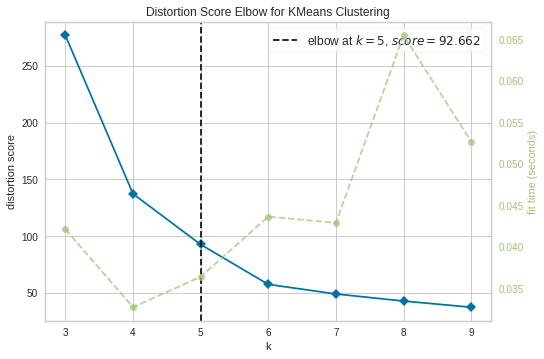

In [ ]:
from yellowbrick.cluster.elbow import KElbow
# Tulis di sini
tes_models = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_models, k=(3,10))
visualizer.fit(Y)
visualizer.show()

In [ ]:
jumlah_cluster = 6
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

#Training model
model_kmeans.fit(Y)

KMeans(n_clusters=6, random_state=42)

In [ ]:
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([0, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 0, 4,
       3, 4, 3, 4, 0, 0, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4, 0, 0, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 5, 5, 5, 5],
      dtype=int32)

In [ ]:
print(model_kmeans.cluster_centers_)

[[ 8.52161915e-03 -1.45605684e-01 -7.08913123e-01]
 [-1.42033960e-01  7.52694521e+00 -1.18685394e-01]
 [-3.03160327e-01 -1.40061264e-01  6.69516106e-01]
 [ 6.44695610e+00  1.73772025e-01  5.57582390e-03]
 [-2.18611962e-01  3.73421316e-01  4.15876808e+00]]


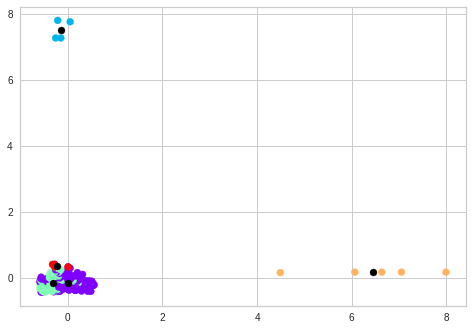

In [ ]:
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='rainbow')

#Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

In [ ]:
SC_kmeans = silhouette_score(Y, labels_kmeans, metric = 'euclidean')
print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.48744316718385444


In [ ]:
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,0
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


In [ ]:
for i in range(jumlah_cluster):
  print(f'Cluster ke{i}')
  print('Rata rata umur customer :', data[data['Hasil_Clustering']==i]['Age'].mean())
  print('Rata rata pemasukan customer :', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata rata pengeluaran customer :', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke0
Rata rata umur customer : 45.131147540983605
Rata rata pemasukan customer : 56.368852459016395
Rata rata pengeluaran customer : 29.975409836065573

Cluster ke1
Rata rata umur customer : 38.25
Rata rata pemasukan customer : 1167.0
Rata rata pengeluaran customer : 48.5

Cluster ke2
Rata rata umur customer : 30.885714285714286
Rata rata pemasukan customer : 57.17142857142857
Rata rata pengeluaran customer : 73.23809523809524

Cluster ke3
Rata rata umur customer : 339.4
Rata rata pemasukan customer : 102.6
Rata rata pengeluaran customer : 52.4

Cluster ke4
Rata rata umur customer : 34.75
Rata rata pemasukan customer : 131.5
Rata rata pengeluaran customer : 182.75



## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
